# Import required modules for the analysis and visualizations

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

# Read the ethereum data using pandas
Data is in CSV format,So using read_csv('') function of Pandas import the data.

In [155]:
data = pd.read_csv('all_data.csv')


In [156]:
data.info()
print('-'*90)
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 8 columns):
timestamp           684 non-null float64
total_addresses     684 non-null float64
blocksize           684 non-null float64
price_USD           684 non-null float64
hashrate            684 non-null float64
total_eth_growth    684 non-null float64
market-cap-value    684 non-null float64
transactions        684 non-null float64
dtypes: float64(8)
memory usage: 42.8 KB
------------------------------------------------------------------------------------------
      timestamp  total_addresses  blocksize  price_USD  hashrate  \
0  1.438214e+09           9205.0      644.0        0.0   23.7569   
1  1.438301e+09           9361.0      582.0        0.0   48.1584   
2  1.438387e+09           9476.0      575.0        0.0   55.2709   
3  1.438474e+09           9563.0      581.0        0.0   64.1779   
4  1.438560e+09           9639.0      587.0        0.0   69.8559   

   total_eth_growth  market

# Total_eth_growth and market-cap-value are columns with same values so we will drop one of them


In [157]:
data = data.drop(['total_eth_growth'],axis=1)


# Convert Unix time stamp to normal time 


In [158]:
dateconv = np.vectorize(dt.datetime.fromtimestamp)
data['timestamp'] = dateconv(data['timestamp'])
print(data.head())

            timestamp  total_addresses  blocksize  price_USD  hashrate  \
0 2015-07-30 05:30:00           9205.0      644.0        0.0   23.7569   
1 2015-07-31 05:30:00           9361.0      582.0        0.0   48.1584   
2 2015-08-01 05:30:00           9476.0      575.0        0.0   55.2709   
3 2015-08-02 05:30:00           9563.0      581.0        0.0   64.1779   
4 2015-08-03 05:30:00           9639.0      587.0        0.0   69.8559   

   market-cap-value  transactions  
0      7.204931e+07        8893.0  
1      7.208550e+07           0.0  
2      7.211320e+07           0.0  
3      7.214143e+07           0.0  
4      7.216940e+07           0.0  


# Plot the each column against date


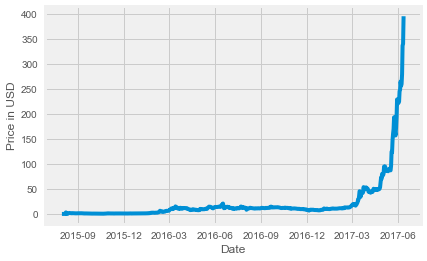

In [159]:
plt.plot(data['timestamp'],data['price_USD'])
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

We can see the spike in the Ether prices during  June ,2017

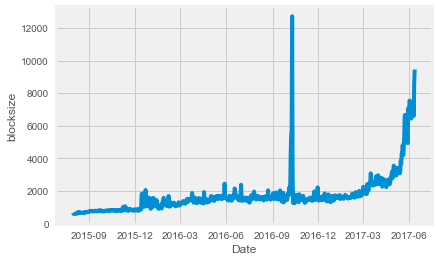

In [160]:
plt.plot(data['timestamp'],data['blocksize'])
plt.xlabel('Date')
plt.ylabel('blocksize')
plt.show()

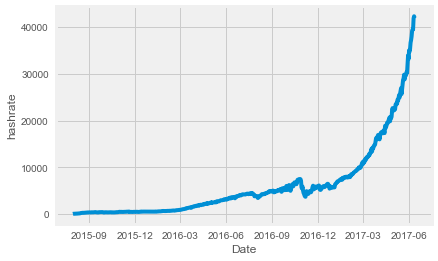

In [161]:
plt.plot(data['timestamp'],data['hashrate'])
plt.xlabel('Date')
plt.ylabel('hashrate')
plt.show()

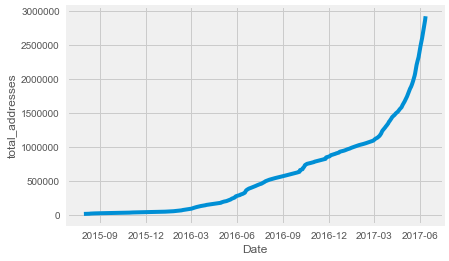

In [162]:
plt.plot(data['timestamp'],data['total_addresses'])
plt.xlabel('Date')
plt.ylabel('total_addresses')
plt.show()

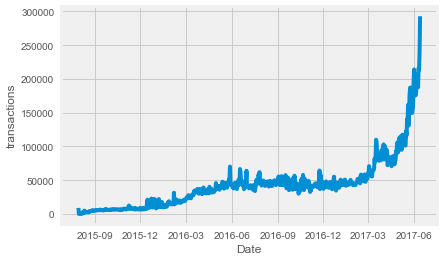

In [163]:
plt.plot(data['timestamp'],data['transactions'])
plt.xlabel('Date')
plt.ylabel('transactions')
plt.show()

#### Making subplots
I will show you 3 ways of making subplots
1 ) subplot2grid ,
2 ) add_subplot ,
3 ) subplots ,

I am creating 3 subplots in a single page with common sharing x-axis using 3 methods mentioned above. 

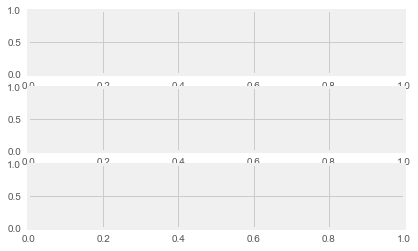

In [164]:
ax1 = plt.subplot2grid((3,1),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((3,1),(1,0),rowspan=1,colspan=1)
ax3 = plt.subplot2grid((3,1),(2,0),rowspan=1,colspan=1)

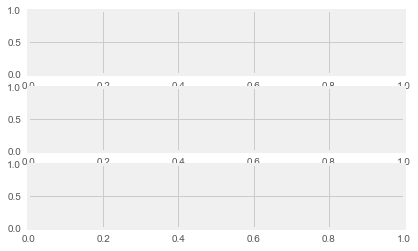

In [165]:
fig= plt.figure()
ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)

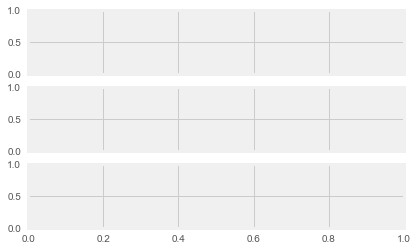

In [166]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharex= True) 

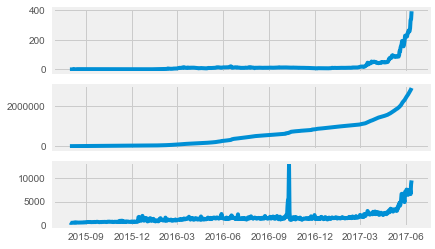

In [141]:
ax1.plot(data['timestamp'],data['price_USD'])
ax2.plot(data['timestamp'],data['total_addresses'])
ax3.plot(data['timestamp'],data['blocksize'])
plt.show()

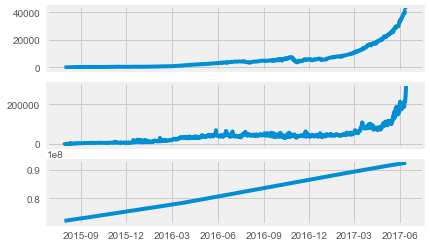

In [142]:
fig2,(ax1,ax2,ax3) = plt.subplots(3,1,sharex= True) 
ax1.plot(data['timestamp'],data['hashrate'])
ax2.plot(data['timestamp'],data['transactions'])
ax3.plot(data['timestamp'],data['market-cap-value'])
plt.show()